## Task 1: Import Libraries

In [ ]:
!pip install livelossplot

In [ ]:
from livelossplot.inputs.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.4.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 2: Load and Preprocess Data

In [ ]:
train_images = pd.read_csv('drive/My Drive/COVID/dataset/train/images.csv', header = None)
train_labels = pd.read_csv('drive/My Drive/COVID/dataset/train/labels.csv')

val_images = pd.read_csv('drive/My Drive/COVID/dataset/validation/images.csv', header = None)
val_labels= pd.read_csv('drive/My Drive/COVID/dataset/validation/labels.csv', header = None, names=['sound'])

In [ ]:
train_images = train_images.drop(0).reset_index().drop('index',axis=1)

In [ ]:
train_images

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,24536,24537,24538,24539,24540,24541,24542,24543,24544,24545,24546,24547,24548,24549,24550,24551,24552,24553,24554,24555,24556,24557,24558,24559,24560,24561,24562,24563,24564,24565,24566,24567,24568,24569,24570,24571,24572,24573,24574,24575
0,0.309804,0.003922,0.443137,0.333333,0.000000,0.458824,0.466667,0.000000,0.462745,0.454902,0.003922,0.478431,0.333333,0.000000,0.458824,0.329412,0.003922,0.458824,0.482353,0.000000,0.447059,0.345098,0.003922,0.462745,0.435294,0.003922,0.494118,0.368627,0.000000,0.470588,0.435294,0.003922,0.494118,0.368627,0.000000,0.470588,0.333333,0.000000,0.458824,0.427451,...,0.807843,1.000000,1.000000,0.941176,1.000000,1.000000,0.823529,1.000000,0.898039,0.282353,1.000000,0.874510,0.219608,1.000000,1.000000,0.749020,1.000000,0.988235,0.537255,1.000000,1.000000,0.690196,1.000000,0.980392,0.517647,1.000000,1.000000,0.588235,1.000000,1.000000,0.627451,1.000000,1.000000,0.643137,1.000000,1.000000,0.650980,1.000000,1.000000,0.611765
1,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216,0.000000,0.000000,0.007843,0.000000,0.003922,0.164706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.819608,0.066667,1.000000,0.811765,0.035294,0.976471,0.333333,0.000000,0.952941,0.098039,0.000000,0.972549,0.349020,0.000000,1.000000,0.725490,0.000000,1.000000,0.823529,0.074510,0.992157,0.549020,0.000000,0.847059,0.000000,0.090196,0.917647,0.003922,0.019608,1.000000,0.850980,0.149020,1.000000,0.705882,0.000000,0.968627,0.254902,0.000000
2,0.376471,0.003922,0.474510,0.309804,0.003922,0.443137,0.368627,0.000000,0.470588,0.290196,0.000000,0.435294,0.345098,0.003922,0.462745,0.301961,0.000000,0.439216,0.411765,0.003922,0.494118,0.329412,0.003922,0.458824,0.392157,0.000000,0.478431,0.376471,0.003922,0.474510,0.200000,0.000000,0.396078,0.360784,0.003922,0.470588,0.356863,0.000000,0.466667,0.368627,...,0.000000,0.972549,0.301961,0.000000,0.996078,0.580392,0.000000,1.000000,0.749020,0.000000,1.000000,0.619608,0.000000,1.000000,0.725490,0.000000,0.992157,0.556863,0.000000,1.000000,0.843137,0.125490,1.000000,0.854902,0.160784,1.000000,0.847059,0.137255,1.000000,0.643137,0.000000,1.000000,0.721569,0.000000,0.996078,0.541176,0.000000,1.000000,0.819608,0.066667
3,0.352941,0.003922,0.466667,0.309804,0.003922,0.443137,0.454902,0.003922,0.470588,0.352941,0.003922,0.466667,0.345098,0.003922,0.462745,0.509804,0.000000,0.415686,0.356863,0.000000,0.466667,0.454902,0.003922,0.478431,0.454902,0.003922,0.478431,0.415686,0.000000,0.494118,0.478431,0.003922,0.454902,0.435294,0.003922,0.494118,0.427451,0.000000,0.498039,0.392157,...,0.282353,1.000000,1.000000,0.650980,1.000000,1.000000,0.729412,1.000000,0.972549,0.486275,1.000000,1.000000,0.737255,1.000000,1.000000,0.690196,1.000000,1.000000,0.870588,1.000000,0.980392,0.509804,1.000000,0.694118,0.000000,1.000000,0.901961,0.298039,1.000000,0.909804,0.321569,1.000000,0.952941,0.443137,1.000000,1.000000,0.823529,1.000000,1.000000,0.678431
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.062745,0.000000,0.003922,0.125490,0.000000,0.000000,0.070588,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.807843,0.027451,0.996078,0.521569,0.000000,1.000000,0.698039,0.000000,1.000000,0.658824,0.000000,1.000000,0.576471,0.000000,0.972549,0.329412,0.000000,0.964706,0.243137,0.000000,1.000000,0.792157,0.000000,1.000000,0.733333,0.000000,0.937255,0.003922,0.003922,0.964706,0.196078,0.000000,0.984314,0.388235,0.000000,1.000000,0.666667,0.000000
...,...,...,...

In [ ]:
val_images = val_images.drop(0).reset_index().drop('index',axis=1)

In [ ]:
val_images

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,24536,24537,24538,24539,24540,24541,24542,24543,24544,24545,24546,24547,24548,24549,24550,24551,24552,24553,24554,24555,24556,24557,24558,24559,24560,24561,24562,24563,24564,24565,24566,24567,24568,24569,24570,24571,24572,24573,24574,24575
0,0.000000,0.000000,0.180392,0.000000,0.000000,0.211765,0.000000,0.003922,0.192157,0.000000,0.000000,0.235294,0.000000,0.003922,0.196078,0.000000,0.003922,0.298039,0.000000,0.000000,0.211765,0.000000,0.000000,0.219608,0.000000,0.000000,0.235294,0.000000,0.003922,0.258824,0.000000,0.000000,0.219608,0.000000,0.000000,0.235294,0.000000,0.003922,0.266667,0.000000,...,0.000000,0.972549,0.309804,0.000000,0.980392,0.356863,0.000000,0.988235,0.439216,0.000000,0.964706,0.235294,0.000000,0.937255,0.003922,0.003922,0.968627,0.294118,0.000000,0.972549,0.321569,0.000000,0.980392,0.411765,0.000000,0.980392,0.411765,0.000000,0.976471,0.372549,0.000000,0.984314,0.435294,0.000000,0.976471,0.333333,0.000000,0.960784,0.211765,0.000000
1,0.639216,0.003922,0.298039,0.623529,0.003922,0.305882,0.603922,0.003922,0.325490,0.654902,0.000000,0.274510,0.619608,0.003922,0.313725,0.600000,0.003922,0.329412,0.611765,0.000000,0.325490,0.631373,0.000000,0.298039,0.611765,0.000000,0.325490,0.611765,0.000000,0.317647,0.623529,0.003922,0.305882,0.619608,0.003922,0.313725,0.600000,0.003922,0.329412,0.619608,...,0.682353,0.996078,1.000000,0.666667,1.000000,1.000000,0.737255,1.000000,1.000000,0.596078,1.000000,0.992157,0.556863,1.000000,1.000000,0.576471,1.000000,1.000000,0.862745,1.000000,1.000000,0.596078,1.000000,1.000000,0.682353,1.000000,1.000000,0.713725,1.000000,1.000000,0.619608,1.000000,0.964706,0.478431,0.996078,1.000000,0.674510,0.996078,0.941176,0.411765
2,0.050980,0.003922,0.333333,0.066667,0.003922,0.349020,0.098039,0.000000,0.356863,0.082353,0.003922,0.352941,0.101961,0.003922,0.360784,0.031373,0.000000,0.325490,0.090196,0.000000,0.352941,0.117647,0.003922,0.364706,0.031373,0.000000,0.325490,0.062745,0.000000,0.345098,0.117647,0.003922,0.364706,0.062745,0.000000,0.345098,0.054902,0.000000,0.333333,0.082353,...,0.000000,1.000000,0.898039,0.290196,1.000000,0.705882,0.000000,1.000000,0.858824,0.176471,1.000000,0.913725,0.341176,1.000000,0.847059,0.137255,1.000000,0.847059,0.137255,1.000000,0.858824,0.176471,1.000000,0.937255,0.392157,1.000000,0.815686,0.047059,1.000000,0.909804,0.321569,1.000000,0.654902,0.000000,1.000000,0.752941,0.000000,0.996078,0.533333,0.000000
3,0.450980,0.003922,0.478431,0.462745,0.003922,0.462745,0.478431,0.003922,0.458824,0.454902,0.003922,0.470588,0.439216,0.000000,0.486275,0.447059,0.000000,0.478431,0.454902,0.003922,0.470588,0.466667,0.000000,0.454902,0.478431,0.003922,0.454902,0.470588,0.003922,0.458824,0.450980,0.003922,0.478431,0.439216,0.000000,0.486275,0.439216,0.000000,0.486275,0.450980,...,0.000000,1.000000,0.905882,0.309804,1.000000,0.850980,0.149020,1.000000,0.611765,0.000000,0.996078,0.572549,0.000000,1.000000,0.831373,0.086275,1.000000,0.941176,0.403922,1.000000,0.901961,0.298039,1.000000,0.886275,0.243137,1.000000,0.858824,0.168627,0.996078,0.913725,0.321569,1.000000,0.847059,0.129412,1.000000,0.874510,0.211765,1.000000,0.733333,0.000000
4,0.619608,0.003922,0.313725,0.549020,0.000000,0.376471,0.603922,0.003922,0.329412,0.623529,0.003922,0.305882,0.568627,0.000000,0.356863,0.584314,0.003922,0.349020,0.615686,0.000000,0.317647,0.647059,0.003922,0.290196,0.603922,0.003922,0.325490,0.619608,0.003922,0.313725,0.615686,0.000000,0.317647,0.517647,0.003922,0.419608,0.568627,0.000000,0.356863,0.611765,...,0.125490,1.000000,0.909804,0.321569,1.000000,0.952941,0.443137,1.000000,1.000000,0.882353,1.000000,1.000000,0.713725,1.000000,1.000000,0.596078,0.996078,0.913725,0.321569,1.000000,1.000000,0.603922,1.000000,0.992157,0.549020,1.000000,0.980392,0.517647,0.996078,0.835294,0.105882,1.000000,0.780392,0.000000,1.000000,0.850980,0.149020,1.000000,0.968627,0.478431
...,...,...,...

In [ ]:
train_labels

,sound
0,tachypnea
1,healthy
2,healthy
3,fine crackles
4,healthy
...,...
4478,healthy
4479,healthy
4480,coarse crackles
4481,both


In [ ]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)

Training set shape: (4483, 24576) (4483, 1)
Validation set shape: (2415, 24576) (2415, 1)


In [ ]:
x_train = train_images.values.reshape(4483,64, 128, 3)

In [ ]:
x_val = val_images.values.reshape(2415,64, 128, 3)

In [ ]:
a=[]

In [ ]:
p = val_labels.copy()
a = p['sound'].apply(lambda x: [1,1,0,0,1] if x=='both' else([1,0,0,0,0] if x=='coarse crackles' else([0,1,0,0,0] if x=='fine crackles' else([0,0,1,0,0] if x=='healthy' else([0,0,0,1,0] if x=='tachypnea' else([0,0,0,0,1]))))))

In [ ]:
y_val = pd.DataFrame(list(a))

In [ ]:
b = []

In [ ]:
m = train_labels.copy()
b = m['sound'].apply(lambda x: [1,1,0,0,1] if x=='both' else([1,0,0,0,0] if x=='coarse crackles' else([0,1,0,0,0] if x=='fine crackles' else([0,0,1,0,0] if x=='healthy' else([0,0,0,1,0] if x=='tachypnea' else([0,0,0,0,1]))))))

In [ ]:
y_train = pd.DataFrame(list(b))

In [ ]:
y_val

,0,1,2,3,4,5
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
2410,0,1,0,0,0,0
2411,0,0,1,0,0,0
2412,0,0,0,1,0,0
2413,0,0,0,0,1,0


In [ ]:
y_train

,0,1,2,3,4,5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
4478,0,0,0,1,0,0
4479,0,0,0,1,0,0
4480,0,1,0,0,0,0
4481,1,0,0,0,0,0


## Task 3: Plot 2D Spectrograms

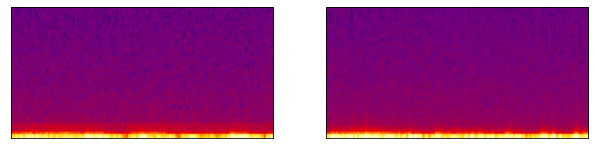

In [ ]:
plt.figure(0, figsize=(16,32))
for i in range(1,3):
    plt.subplot(1,3,i)
    img = np.squeeze(np.squeeze(x_train[np.random.randint(0, x_train.shape[0])]))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

## Task 4: Create Training and Validation Data Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)
datagen_val.fit(x_val)

In [ ]:
ImageDataGenerator?

## Task 5: Creating the CNN Model

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32, (5,5), padding='same', input_shape=(64, 128, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# 2nd Convolution layer
model.add(Conv2D(64, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(6, activation='softmax'))

## Task 6: Learning Rate Scheduling and Compile the Model

In [ ]:
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

## Task 7: Training the Model

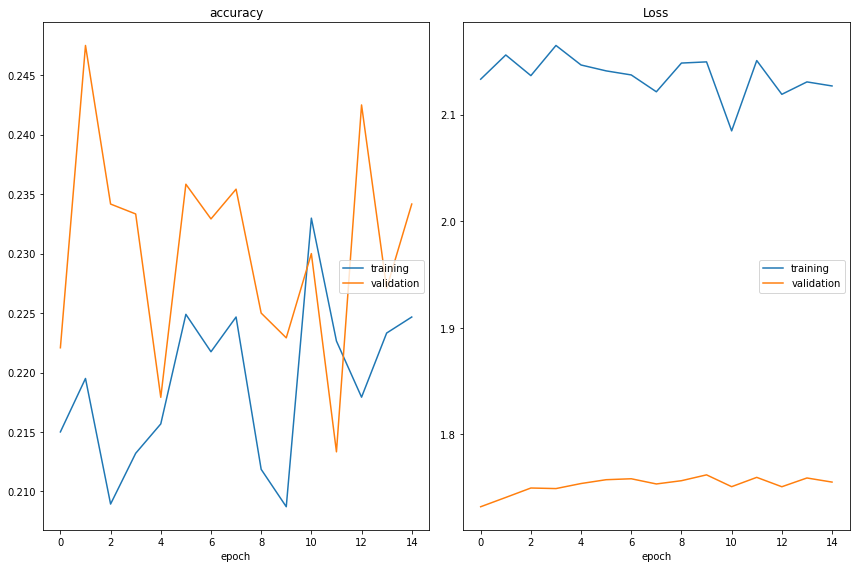

accuracy
	training         	 (min:    0.209, max:    0.233, cur:    0.225)
	validation       	 (min:    0.213, max:    0.248, cur:    0.234)
Loss
	training         	 (min:    2.085, max:    2.165, cur:    2.127)
	validation       	 (min:    1.732, max:    1.762, cur:    1.755)


In [ ]:
checkpoint = ModelCheckpoint('model_weight.h5', monitor='val_loss',
                            save_weights_only=True, mode='min', verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]

batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch = len(x_train) // batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val) // batch_size,
    epochs=15,
    callbacks=callbacks
)

## Task 8: Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns



In [ ]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
